<a href="https://colab.research.google.com/github/ViniciusPezatti/Case_DNC/blob/main/Case_Classifica%C3%A7%C3%A3o_de_clientes_com_maior_risco_de_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Etapa 01) Importação de Bibliotecas e Conjunto de Dados.

In [1]:
!pip install feature-engine
!pip install scikit-optimize
!pip install scikit-metrics
!pip install imblearn

In [2]:
#análise de dados
import pandas as pd
import numpy as np

#visualização
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

#divisão da base de dados
from sklearn.model_selection import train_test_split

#tratamento dos dados categóricos e numéricos
from sklearn.preprocessing import MinMaxScaler

#classificadores
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE



#métricas de avaliação de qualidade
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import GridSearchCV

#remoção de aviso de erro para o BayesSearchCV
import warnings
warnings.filterwarnings('ignore', message='The objective has been evaluated at this point before.')

In [3]:
#Lendo os Dados
df= pd.read_csv('/content/BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [4]:
#Verificando os tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

#Etapa 02) Tratamento dos Dados

In [5]:
#Verificando as estatísticas descritivas
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [6]:
#Verificando dimensão
df.shape

(10127, 23)

In [7]:
#Verificando a Quantidade de Nulos
df.isna().sum()

,0
CLIENTNUM,0
Attrition_Flag,0
Customer_Age,0
Gender,0
Dependent_count,0
Education_Level,0
Marital_Status,0
Income_Category,0
Card_Category,0
Months_on_book,0


#Etapa 03) Limpeza dos Dados

In [8]:
#Agrupando Clientes que deram churn por userid
Churn_UserId = df.groupby("Attrition_Flag")['CLIENTNUM'].count().reset_index()

<Axes: xlabel='Attrition_Flag', ylabel='CLIENTNUM'>

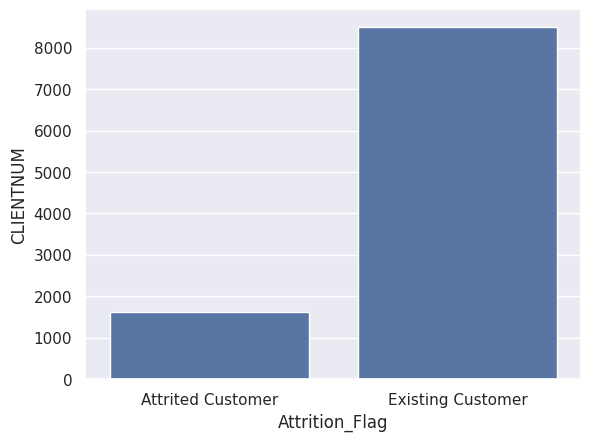

In [9]:
#Plotando quantidade de clientes que deram churn (1) e que não deram churn (0)
sns.barplot(data=Churn_UserId, x = "Attrition_Flag",y = "CLIENTNUM")

In [10]:
#Criando uma nova coluna 'Churn' e atribuindo valores numéricos
df['Churn'] = df['Attrition_Flag'].map({'Attrited Customer': 1, 'Existing Customer': 0})

In [11]:
#Verificando dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 24 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

#Etapa 04) Análise Exploratória de Dados (EDA):

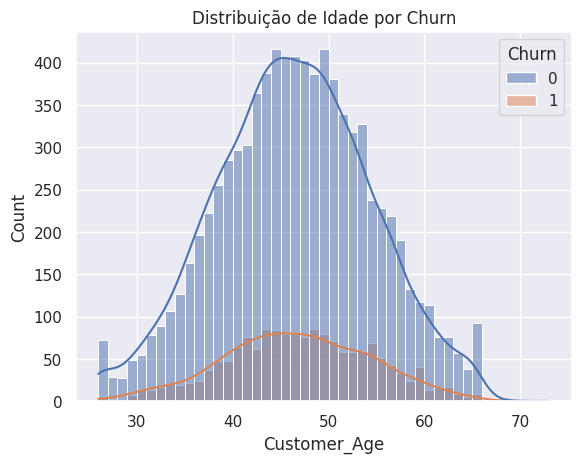

In [12]:
sns.histplot(data=df, x='Customer_Age', hue='Churn', kde=True)
plt.title('Distribuição de Idade por Churn')
plt.show()

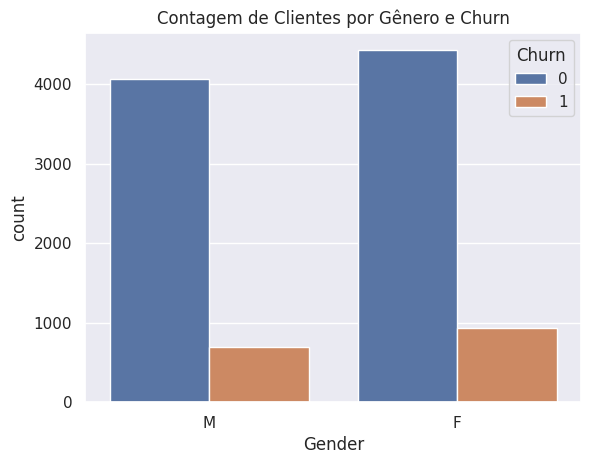

In [13]:
sns.countplot(x='Gender', hue='Churn', data=df)
plt.title('Contagem de Clientes por Gênero e Churn')
plt.show()

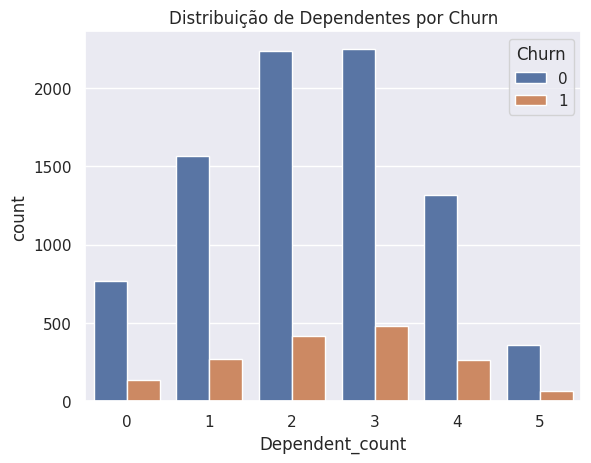

In [14]:
sns.countplot(x='Dependent_count', hue='Churn', data=df)
plt.title('Distribuição de Dependentes por Churn')
plt.show()

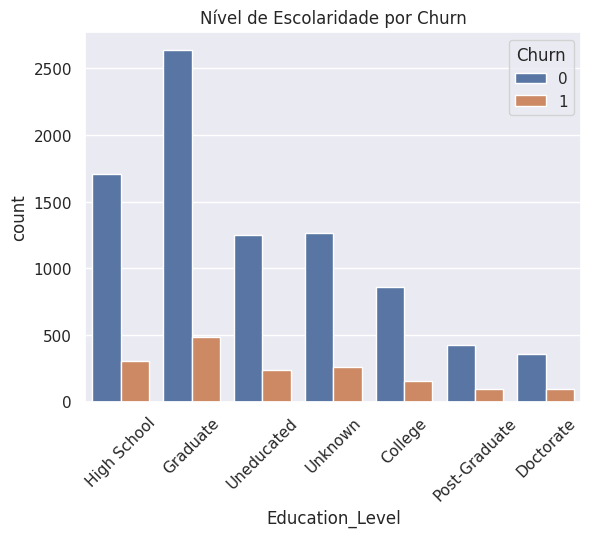

In [15]:
sns.countplot(x='Education_Level', hue='Churn', data=df)
plt.title('Nível de Escolaridade por Churn')
plt.xticks(rotation=45)
plt.show()

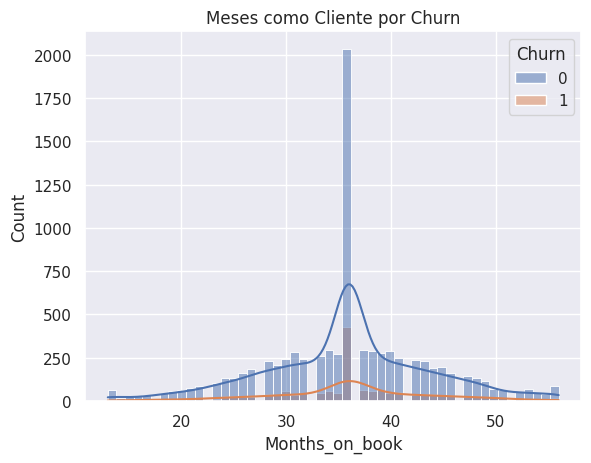

In [16]:
sns.histplot(data=df, x='Months_on_book', hue='Churn', kde=True)
plt.title('Meses como Cliente por Churn')
plt.show()

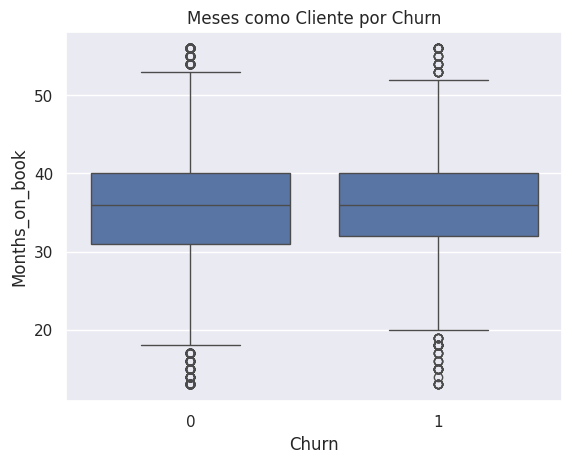

In [17]:
# Example: Box Plot for Time on Platform by Churn
sns.boxplot(x='Churn', y='Months_on_book', data=df)
plt.title('Meses como Cliente por Churn')
plt.show()

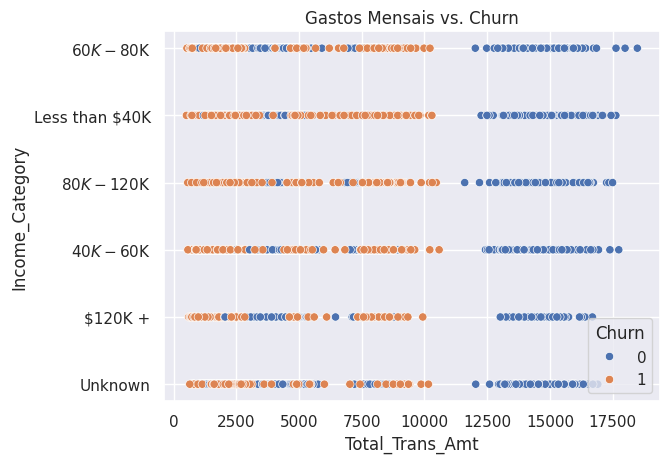

In [18]:
sns.scatterplot(x='Total_Trans_Amt', y='Income_Category', hue='Churn', data=df)
plt.title('Gastos Mensais vs. Churn')
plt.show()

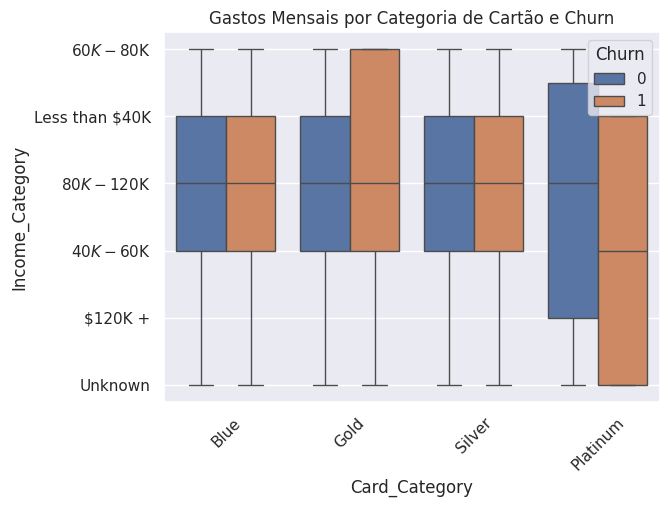

In [19]:
sns.boxplot(x='Card_Category', y='Income_Category', hue='Churn', data=df)
plt.title('Gastos Mensais por Categoria de Cartão e Churn')
plt.xticks(rotation=45)
plt.show()

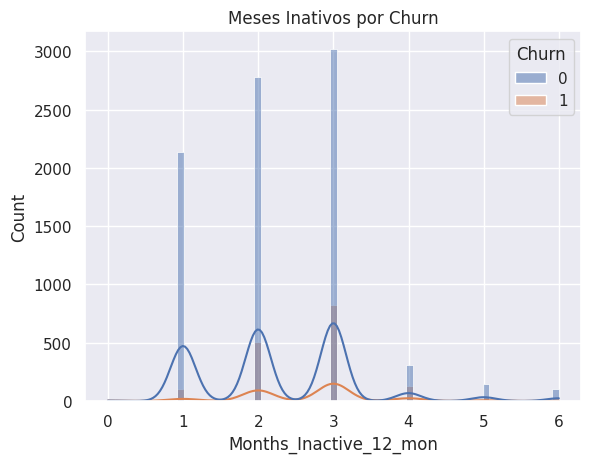

In [20]:
sns.histplot(data=df, x='Months_Inactive_12_mon', hue='Churn', kde=True)
plt.title('Meses Inativos por Churn')
plt.show()

#Etapa 05) Pré-processamento dos Dados:

In [21]:
#Transformando valores churned 0 e 1 por No e Yes
df['Churn'] = df['Churn'].replace(0, 'No')
df['Churn'] = df['Churn'].replace(1, 'Yes')

In [22]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,Churn
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991,No
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994,No
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998,No
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987,No
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998,No


In [23]:
label_encoder = LabelEncoder()
categorical_cols = ['Gender', 'Education_Level', 'Marital_Status', 'Card_Category']
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [24]:
#Normalização dos dados
scaler = MinMaxScaler()
numeric_features = ['Total_Relationship_Count','Avg_Utilization_Ratio', 'Months_on_book', 'Total_Trans_Amt']
df[numeric_features] = scaler.fit_transform(df[numeric_features])

#Etapa 06) Criação, Treinamento e Avaliação do Modelo

## Regressão Logística

In [27]:
#Definindo variáveis, não queremos o user_id e o churned pois o churned será utilizado na variável y e o user id não é parâmetro
X = df.drop(columns=['CLIENTNUM', 'Churn', 'Attrition_Flag', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis = 1)

In [28]:
#Definindo variáveis
y = df[['Churn']]

In [30]:
#Fitando modelo
le = LabelEncoder()
le.fit(y.Churn)
y.Churned = le.transform(y.Churn)
X = pd.get_dummies(X)

<ipython-input-30-0efe8301d636>:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  y.Churned = le.transform(y.Churn)


In [32]:
#Feature engineering
mm = MinMaxScaler()
X = pd.DataFrame(mm.fit_transform(X))

In [33]:
#Separando a base de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [34]:
#Modelando
model = LogisticRegression()

In [35]:
#Fitando o modelo
lr = model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
lr.predict(X_test)

array(['Yes', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [37]:
X_test.assign(clients=y_test).assign(label = lr.predict(X_test))

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,clients,label
5066,0.382979,0.0,0.8,0.833333,0.666667,0.0,0.441860,1.0,0.500000,0.666667,...,0.109316,0.118118,0.0,0.0,0.0,0.0,1.0,0.0,Yes,Yes
1964,0.319149,0.0,0.8,0.833333,0.666667,0.0,0.465116,1.0,0.666667,0.500000,...,0.279483,0.429429,0.0,0.0,0.0,0.0,0.0,1.0,No,No
955,0.595745,0.0,0.0,0.666667,0.666667,1.0,0.604651,1.0,0.333333,0.500000,...,0.205977,0.196196,0.0,0.0,0.0,0.0,1.0,0.0,No,No
651,0.191489,1.0,0.6,0.333333,0.666667,0.0,0.255814,0.6,0.166667,0.333333,...,0.269251,0.037037,0.0,0.0,0.0,1.0,0.0,0.0,No,No
5631,0.446809,0.0,0.4,0.000000,0.333333,0.0,0.674419,0.4,0.500000,0.500000,...,0.177167,0.624625,0.0,0.0,0.0,0.0,0.0,1.0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4352,0.297872,0.0,0.8,0.666667,0.333333,0.0,0.534884,0.6,0.166667,0.500000,...,0.201939,0.652653,0.0,0.0,0.0,0.0,1.0,0.0,No,No
5433,0.574468,0.0,0.6,1.000000,0.333333,0.0,0.813953,0.8,0.166667,0.333333,...,0.167474,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,No,No
3943,0.361702,0.0,0.8,0.500000,1.000000,0.0,0.604651,0.4,0.500000,0.500000,...,0.177437,0.644645,0.0,0.0,0.0,0.0,1.0,0.0,No,No
9723,0.170213,1.0,0.2,0.833333,0.333333,0.0,0.116279,0.4,0.333333,0.333333,...,0.183360,0.156156,0.0,0.0,1.0,0.0,0.0,0.0,No,No


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 24 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

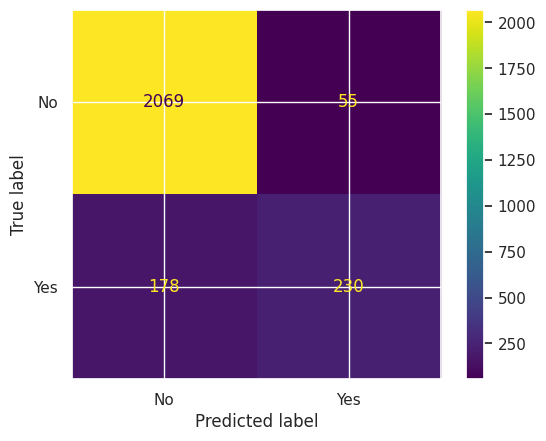

In [39]:
#Matriz confusão
ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test, values_format = "d")

In [40]:
#Métricas
print(f"Acurácia (Treino): {accuracy_score(y_train, lr.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, lr.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, lr.predict(X_test))}")
print("====================================")
# print(f"Precision (Treino): {precision_score(y_train, lr.predict(X_train))}")
# print(f"Precision (Teste): {precision_score(y_test, lr.predict(X_test))}")
# print("====================================")
# print(f"Recall (Treino): {recall_score(y_train, lr.predict(X_train))}")
# print(f"Recall (Teste): {recall_score(y_test, lr.predict(X_test))}")
# print("====================================")
# print(f"F1-Score (Treino): {f1_score(y_train, lr.predict(X_train))}")
# print(f"F1-Score (Teste): {f1_score(y_test, lr.predict(X_test))}")
# print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, lr.predict_proba(X_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])}")

Acurácia (Treino): 0.9015141540487163
Acurácia (Teste): 0.9079778830963665
Acurácia Balanceada (Treino): 0.7515797036260876
Acurácia Balanceada (Teste): 0.7689154757948378
ROCAUC (Treino): 0.9211523576414016
ROCAUC (Teste): 0.9185579834570363


In [41]:
#Aplicando SMOTE para balancear as classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [42]:
# Modelar com Regressão Logística e Tuning
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']}
grid = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid, cv=5)
grid.fit(X_resampled, y_resampled)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'penalty': ['l1', 'l2']})

##Random Forest

In [43]:
rf =  RandomForestClassifier()

In [44]:
rf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [45]:
rf.predict(X_test)

array(['Yes', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [46]:
X_test.assign(churn = y_test).assign(label = rf.predict(X_test))

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,churn,label
5066,0.382979,0.0,0.8,0.833333,0.666667,0.0,0.441860,1.0,0.500000,0.666667,...,0.109316,0.118118,0.0,0.0,0.0,0.0,1.0,0.0,Yes,Yes
1964,0.319149,0.0,0.8,0.833333,0.666667,0.0,0.465116,1.0,0.666667,0.500000,...,0.279483,0.429429,0.0,0.0,0.0,0.0,0.0,1.0,No,No
955,0.595745,0.0,0.0,0.666667,0.666667,1.0,0.604651,1.0,0.333333,0.500000,...,0.205977,0.196196,0.0,0.0,0.0,0.0,1.0,0.0,No,No
651,0.191489,1.0,0.6,0.333333,0.666667,0.0,0.255814,0.6,0.166667,0.333333,...,0.269251,0.037037,0.0,0.0,0.0,1.0,0.0,0.0,No,No
5631,0.446809,0.0,0.4,0.000000,0.333333,0.0,0.674419,0.4,0.500000,0.500000,...,0.177167,0.624625,0.0,0.0,0.0,0.0,0.0,1.0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4352,0.297872,0.0,0.8,0.666667,0.333333,0.0,0.534884,0.6,0.166667,0.500000,...,0.201939,0.652653,0.0,0.0,0.0,0.0,1.0,0.0,No,No
5433,0.574468,0.0,0.6,1.000000,0.333333,0.0,0.813953,0.8,0.166667,0.333333,...,0.167474,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,No,No
3943,0.361702,0.0,0.8,0.500000,1.000000,0.0,0.604651,0.4,0.500000,0.500000,...,0.177437,0.644645,0.0,0.0,0.0,0.0,1.0,0.0,No,No
9723,0.170213,1.0,0.2,0.833333,0.333333,0.0,0.116279,0.4,0.333333,0.333333,...,0.183360,0.156156,0.0,0.0,1.0,0.0,0.0,0.0,No,No


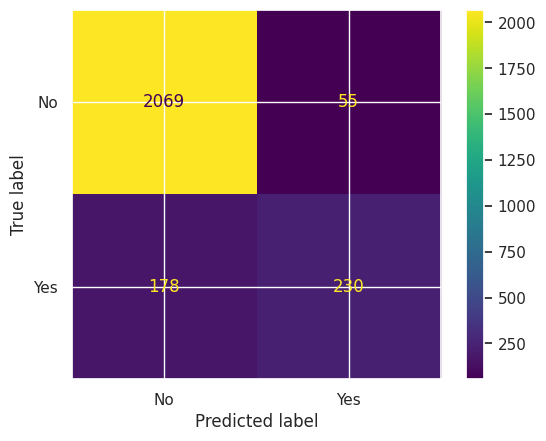

In [47]:
ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test, values_format = "d")

In [48]:

print(f"Acurácia (Treino): {accuracy_score(y_train, rf.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, rf.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, rf.predict(X_test))}")
print("====================================")
# print(f"Precision (Treino): {precision_score(y_train, rf.predict(X_train))}")
# print(f"Precision (Teste): {precision_score(y_test, rf.predict(X_test))}")
# print("====================================")
# print(f"Recall (Treino): {recall_score(y_train, rf.predict(X_train))}")
# print(f"Recall (Teste): {recall_score(y_test, rf.predict(X_test))}")
# print("====================================")
# print(f"F1-Score (Treino): {f1_score(y_train, rf.predict(X_train))}")
# print(f"F1-Score (Teste): {f1_score(y_test, rf.predict(X_test))}")
# print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, rf.predict_proba(X_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])}")

Acurácia (Treino): 1.0
Acurácia (Teste): 0.9569510268562401
Acurácia Balanceada (Treino): 1.0
Acurácia Balanceada (Teste): 0.8852331893209261
ROCAUC (Treino): 1.0
ROCAUC (Teste): 0.9895642932314168


##Tunning

In [49]:
parameters = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'n_estimators': [100, 300, 500]}

grid_search = GridSearchCV(rf, parameters, scoring='accuracy', cv=5, n_jobs=-1)

In [50]:
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [100, 300, 500]},
             scoring='accuracy')

In [51]:
dict = grid_search.best_estimator_.get_params()

In [52]:
from sklearn.ensemble import RandomForestClassifier

rf_tunned =  RandomForestClassifier(bootstrap = True, ccp_alpha = 0.0,
                                     class_weight = None, criterion= 'gini',
                                     max_depth = 10, max_features= 'auto',
                                     max_leaf_nodes = None,
                                     max_samples = None,
                                     min_impurity_decrease = 0.0,
                                     min_samples_leaf = 1,
                                     min_samples_split = 2,
                                     min_weight_fraction_leaf = 0.0,
                                     n_estimators = 500, n_jobs = None,
                                     oob_score = False, random_state = None,
                                     verbose = 0, warm_start = False)

In [53]:
# Hiperparâmetros para tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]}

In [54]:
rf_tunned = RandomForestClassifier(max_features=10)
rf_tunned.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_features=10)

In [55]:
rf_tunned.predict(X_test)

array(['Yes', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [56]:
X_test.assign(churn = y_test).assign(label = rf_tunned.predict(X_test))

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,churn,label
5066,0.382979,0.0,0.8,0.833333,0.666667,0.0,0.441860,1.0,0.500000,0.666667,...,0.109316,0.118118,0.0,0.0,0.0,0.0,1.0,0.0,Yes,Yes
1964,0.319149,0.0,0.8,0.833333,0.666667,0.0,0.465116,1.0,0.666667,0.500000,...,0.279483,0.429429,0.0,0.0,0.0,0.0,0.0,1.0,No,No
955,0.595745,0.0,0.0,0.666667,0.666667,1.0,0.604651,1.0,0.333333,0.500000,...,0.205977,0.196196,0.0,0.0,0.0,0.0,1.0,0.0,No,No
651,0.191489,1.0,0.6,0.333333,0.666667,0.0,0.255814,0.6,0.166667,0.333333,...,0.269251,0.037037,0.0,0.0,0.0,1.0,0.0,0.0,No,No
5631,0.446809,0.0,0.4,0.000000,0.333333,0.0,0.674419,0.4,0.500000,0.500000,...,0.177167,0.624625,0.0,0.0,0.0,0.0,0.0,1.0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4352,0.297872,0.0,0.8,0.666667,0.333333,0.0,0.534884,0.6,0.166667,0.500000,...,0.201939,0.652653,0.0,0.0,0.0,0.0,1.0,0.0,No,No
5433,0.574468,0.0,0.6,1.000000,0.333333,0.0,0.813953,0.8,0.166667,0.333333,...,0.167474,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,No,No
3943,0.361702,0.0,0.8,0.500000,1.000000,0.0,0.604651,0.4,0.500000,0.500000,...,0.177437,0.644645,0.0,0.0,0.0,0.0,1.0,0.0,No,No
9723,0.170213,1.0,0.2,0.833333,0.333333,0.0,0.116279,0.4,0.333333,0.333333,...,0.183360,0.156156,0.0,0.0,1.0,0.0,0.0,0.0,No,No


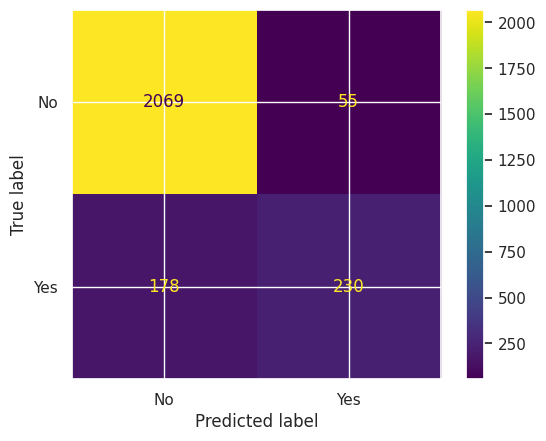

In [57]:
ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test, values_format = "d")

In [58]:
print(f"Acurácia (Treino): {accuracy_score(y_train, rf_tunned.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, rf_tunned.predict(X_test))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, rf_tunned.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, rf_tunned.predict(X_test))}")
print("====================================")
# print(f"Precision (Treino): {precision_score(y_train, rf_tunned.predict(X_train))}")
# print(f"Precision (Teste): {precision_score(y_test, rf_tunned.predict(X_test))}")
# print("====================================")
# print(f"Recall (Treino): {recall_score(y_train, rf_tunned.predict(X_train))}")
# print(f"Recall (Teste): {recall_score(y_test, rf_tunned.predict(X_test))}")
# print("====================================")
# print(f"F1-Score (Treino): {f1_score(y_train, rf_tunned.predict(X_train))}")
# print(f"F1-Score (Teste): {f1_score(y_test, rf_tunned.predict(X_test))}")
# print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, rf_tunned.predict_proba(X_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, rf_tunned.predict_proba(X_test)[:,1])}")

Acurácia (Treino): 1.0
Acurácia (Teste): 0.9680094786729858
Acurácia Balanceada (Treino): 1.0
Acurácia Balanceada (Teste): 0.9254874266090618
ROCAUC (Treino): 1.0
ROCAUC (Teste): 0.9910967329493003


In [62]:

print("=============================================================")
print("=============  Regressão Logística ==========================")
print("=============================================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, lr.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, lr.predict(X_test))}")
print("=============================================================")


print("=============  Random Forest ================================")
print("=============================================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, rf.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, rf.predict(X_test))}")
print("=============================================================")



print("=============  Random Forest Tunning  =======================")
print("=============================================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, rf_tunned.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, rf_tunned.predict(X_test))}")
print("=============================================================")

=============  Regressão Logística ==========================
Acurácia Balanceada (Treino): 0.7515797036260876
Acurácia Balanceada (Teste): 0.7689154757948378
=============  Random Forest ================================
Acurácia Balanceada (Treino): 1.0
Acurácia Balanceada (Teste): 0.8852331893209261
=============  Random Forest Tunning  =======================
Acurácia Balanceada (Treino): 1.0
Acurácia Balanceada (Teste): 0.9254874266090618
